<a href="https://www.kaggle.com/code/anthonymoorecap4611/anthony-moore-titanic-assignment?scriptVersionId=108346622" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Loading Data

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

# Exploratory Data Analysis

### Training Data Findings
The data in the "Cabin" and "Age" columns look to be incomplete in the training data with some values represented as NaN.

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Testing Data Findings
The same goes for the test data.  Some of the values in the "Cabin" and "Age" columns are incomplete with NaN values.

In [4]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### Dealing with N/A values

In [5]:
train_data.fillna(value=0, inplace=True)
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
test_data.fillna(value=0, inplace=True)
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,0,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,0,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,0,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,0,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,0,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0.0,0,0,A.5. 3236,8.0500,0,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0,S
416,1308,3,"Ware, Mr. Frederick",male,0.0,0,0,359309,8.0500,0,S


### Visualize the Data

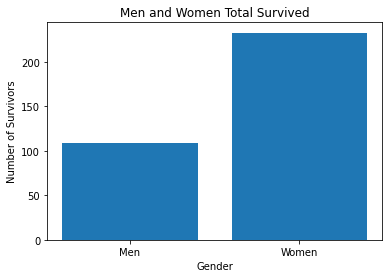

Total men survivors: 109
Total female survivors: 233
Total survivors in traning data: 342


In [7]:
import matplotlib.pyplot as plt

men = train_data.loc[train_data.Sex == 'male']["Survived"]
women = train_data.loc[train_data.Sex == 'female']["Survived"]

plt.bar(['Men','Women'], [sum(men), sum(women)])
plt.title("Men and Women Total Survived")
plt.xlabel("Gender")
plt.ylabel("Number of Survivors")
plt.show()

print(f"Total men survivors: {sum(men)}")
print(f"Total female survivors: {sum(women)}")
print(f"Total survivors in traning data: {sum(men) + sum(women)}")

In the training data, it shows that a larger amount of women survived compared to men.

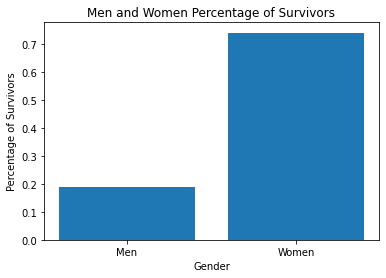

Percentage of women who survived: 0.7420382165605095
Percentage of men who survived: 0.18890814558058924


In [8]:
rate_women = sum(women)/len(women)
rate_men = sum(men)/len(men)

plt.bar(['Men','Women'], [rate_men, rate_women])
plt.title("Men and Women Percentage of Survivors")
plt.xlabel("Gender")
plt.ylabel("Percentage of Survivors")
plt.show()

print("Percentage of women who survived:", rate_women)
print("Percentage of men who survived:", rate_men)

The percentage of survivors show an even larger gap between the amount of survivors that were men versus the amount of survivors that were female.

# Build and Train Models

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]
features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.33)

dtc_model = DecisionTreeClassifier(max_depth=6)
dtc_model.fit(X_train, y_train)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train, y_train)

sgd_model = SGDClassifier(loss='log', learning_rate='adaptive', eta0 = 1)
sgd_model.fit(X_train, y_train)

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestClassifier()

# Evaluate Models and Compare

In [10]:
best_model = None
best_model_score = 0

dtc_score = dtc_model.score(X_test, y_test)
lr_score = lr_model.score(X_test, y_test)
knn_score = knn_model.score(X_test, y_test)
sgd_score = sgd_model.score(X_test, y_test)
rf_score = random_forest.score(X_test, y_test)

scores = [dtc_score, lr_score, knn_score, sgd_score, rf_score]
models = [dtc_model, lr_model, knn_model, sgd_model, random_forest]

for i in range(4):
    if max(scores) == scores[i] and scores[i] > best_model_score:
        best_model = models[i]
        best_model_score = scores[i]
models = pd.DataFrame({'Model': ['DecisionTreeClassifier', 'Linear Regression', 'KNeighborsClassifier', 'SGDClassifier', 'RandomForest'],'Score': scores})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,DecisionTreeClassifier,0.810169
2,KNeighborsClassifier,0.810169
3,SGDClassifier,0.806780
4,RandomForest,0.803390
1,Linear Regression,0.427055


## Cross Validation

In [11]:
dt_val_scores = cross_val_score(dtc_model,X_test,y_test, cv=5)
rf_val_scores = cross_val_score(random_forest,X_test,y_test, cv=5)
print("Decision Tree Average: ", dt_val_scores.sum() / 5, dt_val_scores)
print("Random Forest Average: ", rf_val_scores.sum() / 5, rf_val_scores)

Decision Tree Average:  0.7762711864406779 [0.81355932 0.77966102 0.76271186 0.71186441 0.81355932]
Random Forest Average:  0.7593220338983051 [0.79661017 0.77966102 0.74576271 0.69491525 0.77966102]


### Which is Better

From what I found, the averages are roughly the same for both models. Across multiple runs, both models hover around 75% - 78% accurate.  It is hard to say which model is better based on both of these cross validation averages.

### Results
Consistently Linear Regression proves to not be very good with this type of problem as it consistently gets below 50% even with hyperparameter tuning.  The other three models show similar results floating around 75-80%.  With the best score reaching 83% on SGDClassifier and Decision Tree.

# Generate Submission Data

In [12]:
predictions = best_model.predict(pd.get_dummies(test_data[features]))

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('new_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
